In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
train = pd.read_csv('../data/train.csv') 
test = pd.read_csv('../data/test.csv')
submit=pd.read_csv('../data/sample_submission.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

In [6]:
train.shape

(256351, 69)

In [7]:
categorical_columns=train.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n{col}의 고유값")
    print(train[col].value_counts())
    print('='*50)


ID의 고유값
ID
TRAIN_000000    1
TRAIN_170906    1
TRAIN_170893    1
TRAIN_170894    1
TRAIN_170895    1
               ..
TRAIN_085455    1
TRAIN_085456    1
TRAIN_085457    1
TRAIN_085458    1
TRAIN_256350    1
Name: count, Length: 256351, dtype: int64

시술 시기 코드의 고유값
시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64

시술 당시 나이의 고유값
시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64

시술 유형의 고유값
시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64

특정 시술 유형의 고유값
특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST                      

In [8]:
# 추가로 int64나 float64 타입이지만 실제로는 범주형일 수 있는 컬럼들 중 
# unique 값이 적은 것들도 확인
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    if train[col].nunique() < 10:  # 고유값이 10개 미만인 경우
        print(f"\n{col} 컬럼의 고유값:")
        print(train[col].value_counts())
        print("="*50)


배란 자극 여부 컬럼의 고유값:
배란 자극 여부
1    197720
0     58631
Name: count, dtype: int64

단일 배아 이식 여부 컬럼의 고유값:
단일 배아 이식 여부
0.0    191677
1.0     58383
Name: count, dtype: int64

착상 전 유전 검사 사용 여부 컬럼의 고유값:
착상 전 유전 검사 사용 여부
1.0    2718
Name: count, dtype: int64

착상 전 유전 진단 사용 여부 컬럼의 고유값:
착상 전 유전 진단 사용 여부
0.0    246864
1.0      3196
Name: count, dtype: int64

남성 주 불임 원인 컬럼의 고유값:
남성 주 불임 원인
0    249041
1      7310
Name: count, dtype: int64

남성 부 불임 원인 컬럼의 고유값:
남성 부 불임 원인
0    252989
1      3362
Name: count, dtype: int64

여성 주 불임 원인 컬럼의 고유값:
여성 주 불임 원인
0    248475
1      7876
Name: count, dtype: int64

여성 부 불임 원인 컬럼의 고유값:
여성 부 불임 원인
0    253164
1      3187
Name: count, dtype: int64

부부 주 불임 원인 컬럼의 고유값:
부부 주 불임 원인
0    247874
1      8477
Name: count, dtype: int64

부부 부 불임 원인 컬럼의 고유값:
부부 부 불임 원인
0    254104
1      2247
Name: count, dtype: int64

불명확 불임 원인 컬럼의 고유값:
불명확 불임 원인
0    192076
1     64275
Name: count, dtype: int64

불임 원인 - 난관 질환 컬럼의 고유값:
불임 원인 - 난관 질환
0    220794
1     35557
Name: count, dtype: 

## 결측치 대체

In [10]:
# 결측치가 존재하는 열과 개수 출력
train_missing_values=train.isnull().sum()
train_missing_columns=train_missing_values[train_missing_values > 0]

test_missing_values=test.isnull().sum()
test_missing_columns=test_missing_values[test_missing_values>0]

print("트레인 결측치:")
print(train_missing_columns)
print("="*50)
print("테스트 결측치:")
print(test_missing_columns)


트레인 결측치:
임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
대리모 여부                     6291
PGD 시술 여부                254172
PGS 시술 여부                254422
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982

In [11]:
# 결측치 비율 계산
missing_ratio = (train_missing_values / len(train)) * 100
print("\n결측치 비율(%):")
print(missing_ratio[missing_ratio > 0])


결측치 비율(%):
임신 시도 또는 마지막 임신 경과 연수    96.344855
특정 시술 유형                  0.000780
단일 배아 이식 여부               2.454057
착상 전 유전 검사 사용 여부         98.939735
착상 전 유전 진단 사용 여부          2.454057
배아 생성 주요 이유               2.454057
총 생성 배아 수                 2.454057
미세주입된 난자 수                2.454057
미세주입에서 생성된 배아 수           2.454057
이식된 배아 수                  2.454057
미세주입 배아 이식 수              2.454057
저장된 배아 수                  2.454057
미세주입 후 저장된 배아 수           2.454057
해동된 배아 수                  2.454057
해동 난자 수                   2.454057
수집된 신선 난자 수               2.454057
저장된 신선 난자 수               2.454057
혼합된 난자 수                  2.454057
파트너 정자와 혼합된 난자 수          2.454057
기증자 정자와 혼합된 난자 수          2.454057
동결 배아 사용 여부               2.454057
신선 배아 사용 여부               2.454057
기증 배아 사용 여부               2.454057
대리모 여부                    2.454057
PGD 시술 여부                99.149994
PGS 시술 여부                99.247516
난자 채취 경과일                22.425503
난자 해동 경과일                99.439831
난자 혼합 경과

In [12]:
a=pd.crosstab(train['착상 전 유전 진단 사용 여부'], train['PGD 시술 여부'],dropna=False)
a

PGD 시술 여부,1.0,NaN
착상 전 유전 진단 사용 여부,,
0.0,0,246864
1.0,2179,1017
NaN,0,6291


PGD: 해당 주기가 PGD 치료로 분류되는지 여부

착상 전 유전 진단 사용 여부:PGS(착상 전 유전 진단)가 시행되었는지 여부

-> 이것만으론 공통 NAN를 체울 수 없음 PGD 시술 여부는 삭제

In [14]:
a=pd.crosstab(train['PGS 시술 여부'], train['착상 전 유전 검사 사용 여부'],dropna=False)
a

착상 전 유전 검사 사용 여부,1.0,NaN
PGS 시술 여부,,
1.0,1929,0
NaN,789,253633


PGS: 해당 주기가 PGS 치료로 분류되는지 여부

착상 전 유전 검사 사용 여부:PGS(착상 전 유전 검사)가 시행되었는지 여부

-> 공통 결측치가 253633개 이므로 둘다 삭제하는게 맞다고 생각

In [16]:
# 결측치 비율 계산
train_missing_values=train.isnull().sum()
missing_ratio = (train_missing_values / len(train)) * 100
print("\n결측치 비율(%):")
print(missing_ratio[missing_ratio > 0])


결측치 비율(%):
임신 시도 또는 마지막 임신 경과 연수    96.344855
특정 시술 유형                  0.000780
단일 배아 이식 여부               2.454057
착상 전 유전 검사 사용 여부         98.939735
착상 전 유전 진단 사용 여부          2.454057
배아 생성 주요 이유               2.454057
총 생성 배아 수                 2.454057
미세주입된 난자 수                2.454057
미세주입에서 생성된 배아 수           2.454057
이식된 배아 수                  2.454057
미세주입 배아 이식 수              2.454057
저장된 배아 수                  2.454057
미세주입 후 저장된 배아 수           2.454057
해동된 배아 수                  2.454057
해동 난자 수                   2.454057
수집된 신선 난자 수               2.454057
저장된 신선 난자 수               2.454057
혼합된 난자 수                  2.454057
파트너 정자와 혼합된 난자 수          2.454057
기증자 정자와 혼합된 난자 수          2.454057
동결 배아 사용 여부               2.454057
신선 배아 사용 여부               2.454057
기증 배아 사용 여부               2.454057
대리모 여부                    2.454057
PGD 시술 여부                99.149994
PGS 시술 여부                99.247516
난자 채취 경과일                22.425503
난자 해동 경과일                99.439831
난자 혼합 경과

In [17]:
train.drop(columns=['PGD 시술 여부','PGS 시술 여부','난자 해동 경과일','배아 해동 경과일',
            '임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부'],inplace=True)
test.drop(columns=['PGD 시술 여부','PGS 시술 여부','난자 해동 경과일','배아 해동 경과일',
            '임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부'],inplace=True)

결측치 비율이 80%가 넘는 변수들 삭제

In [19]:
train_missing_cols = train.columns[train.isnull().sum() > 0].tolist()

for col in train_missing_cols:
    print(f"\n{col}의 고유값:")
    value_counts = train[col].value_counts(dropna=False)
    value_counts_percent = train[col].value_counts(normalize=True, dropna=False) * 100  # 비율 계산
    result = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_counts_percent
    })
    print(result)
    print(f"\n결측치 개수: {train[col].isnull().sum()}")  # 결측치 개수 출력
    print("=" * 50)




특정 시술 유형의 고유값:
                                      Count  Percentage
특정 시술 유형                                               
ICSI                                 122368   47.734551
IVF                                   91755   35.792722
Unknown                               26939   10.508639
IUI                                    6100    2.379550
ICSI:ICSI                              2314    0.902669
ICSI / BLASTOCYST                      1609    0.627655
IVF / BLASTOCYST                       1248    0.486833
IVF:IVF                                1146    0.447043
ICSI:IVF                                873    0.340549
ICSI / AH                               769    0.299979
IVF:ICSI                                392    0.152915
IVF / AH                                319    0.124439
ICSI:Unknown                            207    0.080749
IVF:Unknown                             100    0.039009
ICI                                      96    0.037449
Generic DI                      

In [20]:
train["특정 시술 유형"] = train["특정 시술 유형"].fillna("Unknown").astype(str)
test["특정 시술 유형"] = test["특정 시술 유형"].fillna("Unknown").astype(str)

def categorize_treatment(x):
    first_part = x.split(":")[0]  # 첫 번째 값 가져오기

    if first_part == "ICSI":
        return "ICSI"
    elif first_part == "IVF":
        return "IVF"
    elif first_part in ["IUI", "ICI"]:
        return "IUI"
    else:
        return "Unknown"

# ✅ 그룹화 적용 (train & test)
train["특정 시술 유형"] = train["특정 시술 유형"].apply(categorize_treatment)
test["특정 시술 유형"] = test["특정 시술 유형"].apply(categorize_treatment)


세부 범주 및 여러 기법을 하나의 큰 기법으로 변경

In [22]:
train['단일 배아 이식 여부'].value_counts()

단일 배아 이식 여부
0.0    191677
1.0     58383
Name: count, dtype: int64

In [23]:
train_missing_cols = train.columns[train.isnull().sum() > 0].tolist()

for col in train_missing_cols:
    print(f"\n{col}의 고유값:")
    value_counts = train[col].value_counts(dropna=False)
    value_counts_percent = train[col].value_counts(normalize=True, dropna=False) * 100  # 비율 계산
    result = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_counts_percent
    })
    
    # 비율이 90% 이상인 값만 필터링
    result_filtered = result[result['Percentage'] >= 90]
    
    if not result_filtered.empty:  # 필터링된 결과가 있으면 출력
        print(result_filtered)
    
    print(f"\n결측치 개수: {train[col].isnull().sum()}")  # 결측치 개수 출력
    print("=" * 50)



단일 배아 이식 여부의 고유값:

결측치 개수: 6291

착상 전 유전 진단 사용 여부의 고유값:
                   Count  Percentage
착상 전 유전 진단 사용 여부                    
0.0               246864   96.299215

결측치 개수: 6291

배아 생성 주요 이유의 고유값:
              Count  Percentage
배아 생성 주요 이유                    
현재 시술용       233732   91.176551

결측치 개수: 6291

총 생성 배아 수의 고유값:

결측치 개수: 6291

미세주입된 난자 수의 고유값:

결측치 개수: 6291

미세주입에서 생성된 배아 수의 고유값:

결측치 개수: 6291

이식된 배아 수의 고유값:

결측치 개수: 6291

미세주입 배아 이식 수의 고유값:

결측치 개수: 6291

저장된 배아 수의 고유값:

결측치 개수: 6291

미세주입 후 저장된 배아 수의 고유값:

결측치 개수: 6291

해동된 배아 수의 고유값:

결측치 개수: 6291

해동 난자 수의 고유값:
          Count  Percentage
해동 난자 수                    
0.0      248615   96.982263

결측치 개수: 6291

수집된 신선 난자 수의 고유값:

결측치 개수: 6291

저장된 신선 난자 수의 고유값:
              Count  Percentage
저장된 신선 난자 수                    
0.0          247394   96.505963

결측치 개수: 6291

혼합된 난자 수의 고유값:

결측치 개수: 6291

파트너 정자와 혼합된 난자 수의 고유값:

결측치 개수: 6291

기증자 정자와 혼합된 난자 수의 고유값:
                   Count  Percentage
기증자 정자와 혼합된 난자 수        

In [24]:
mode_cols = ["착상 전 유전 진단 사용 여부", "배아 생성 주요 이유", "해동 난자 수", "저장된 신선 난자 수", "기증자 정자와 혼합된 난자 수",
             "기증 배아 사용 여부", "대리모 여부"]

for col in mode_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")


최빈값 비율이 90%가 넘는 컬럼의 결측치를 최빈값으로 대체

In [26]:
train_missing_cols = train.columns[train.isnull().sum() > 0].tolist()

for col in train_missing_cols:
    print(f"\n{col}의 고유값:")
    value_counts = train[col].value_counts(dropna=False)
    value_counts_percent = train[col].value_counts(normalize=True, dropna=False) * 100  # 비율 계산
    result = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_counts_percent
    })
    
    # 비율이 50% 이상인 값만 필터링
    result_filtered = result[result['Percentage'] >= 50]
    
    if not result_filtered.empty:  # 필터링된 결과가 있으면 출력
        print(result_filtered)
    
    print(f"\n결측치 개수: {train[col].isnull().sum()}")  # 결측치 개수 출력
    print("=" * 50)


단일 배아 이식 여부의 고유값:
              Count  Percentage
단일 배아 이식 여부                    
0.0          191677    74.77131

결측치 개수: 6291

총 생성 배아 수의 고유값:

결측치 개수: 6291

미세주입된 난자 수의 고유값:

결측치 개수: 6291

미세주입에서 생성된 배아 수의 고유값:
                  Count  Percentage
미세주입에서 생성된 배아 수                    
0.0              131772   51.402959

결측치 개수: 6291

이식된 배아 수의 고유값:

결측치 개수: 6291

미세주입 배아 이식 수의 고유값:
               Count  Percentage
미세주입 배아 이식 수                    
0.0           138774    54.13437

결측치 개수: 6291

저장된 배아 수의 고유값:
           Count  Percentage
저장된 배아 수                    
0.0       166866   65.092783

결측치 개수: 6291

미세주입 후 저장된 배아 수의 고유값:
                  Count  Percentage
미세주입 후 저장된 배아 수                    
0.0              204294   79.693077

결측치 개수: 6291

해동된 배아 수의 고유값:
           Count  Percentage
해동된 배아 수                    
0.0       209675   81.792152

결측치 개수: 6291

수집된 신선 난자 수의 고유값:

결측치 개수: 6291

혼합된 난자 수의 고유값:

결측치 개수: 6291

파트너 정자와 혼합된 난자 수의 고유값:

결측치 개수: 6291

동결 배아 사용 여부의 고유값:
 

In [27]:
mode_cols = ["단일 배아 이식 여부", "미세주입 후 저장된 배아 수", "해동된 배아 수", "동결 배아 사용 여부", "신선 배아 사용 여부",
             "난자 채취 경과일", "난자 혼합 경과일","저장된 배아 수","미세주입에서 생성된 배아 수","미세주입 배아 이식 수", "미세주입된 난자 수"]

for col in mode_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

추가로 최빈값 비율이 50%이상인 값들도 최빈값으로 대체

In [29]:
train_missing_cols = train.columns[train.isnull().sum() > 0].tolist()

for col in train_missing_cols:
    print(f"\n{col}의 고유값:")
    value_counts = train[col].value_counts(dropna=False)
    value_counts_percent = train[col].value_counts(normalize=True, dropna=False) * 100  # 비율 계산
    result = pd.DataFrame({
        'Count': value_counts,
        'Percentage': value_counts_percent
    })
    print(result)
    print(f"\n결측치 개수: {train[col].isnull().sum()}")  # 결측치 개수 출력
    print("=" * 50)



총 생성 배아 수의 고유값:
           Count  Percentage
총 생성 배아 수                   
0.0        53349   20.810919
4.0        21612    8.430628
3.0        20952    8.173169
5.0        20410    7.961740
2.0        19190    7.485830
6.0        18623    7.264649
7.0        16029    6.252755
1.0        15223    5.938342
8.0        13620    5.313028
9.0        11131    4.342093
10.0        9065    3.536167
11.0        7090    2.765739
NaN         6291    2.454057
12.0        5720    2.231316
13.0        4321    1.685580
14.0        3360    1.310703
15.0        2516    0.981467
16.0        1916    0.747413
17.0        1504    0.586696
18.0        1117    0.435731
19.0         799    0.311682
20.0         640    0.249658
21.0         461    0.179832
22.0         354    0.138092
23.0         266    0.103764
24.0         195    0.076068
25.0         163    0.063585
26.0         105    0.040959
27.0          84    0.032768
28.0          51    0.019895
29.0          46    0.017944
30.0          40    0.0156

In [30]:
median_cols = ['총 생성 배아 수','','이식된 배아 수','수집된 신선 난자 수','혼합된 난자 수','파트너 정자와 혼합된 난자 수','배아 이식 경과일']
for col in median_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].median()  # 🚨 Train 데이터의 중앙값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")


컬럼 이(가) train 또는 test 데이터에 없습니다.


결측치가 50% 미만인 변수들은 정규 분포를 따르면 ->평균, 정규 분포가 아니면 ->중앙값 대체

-> 나머지 변수 모두 정규 분포가 아니므로 중앙값 대체

In [32]:
# 결측치가 존재하는 열과 개수 출력
train_missing_values=train.isnull().sum()
train_missing_columns=train_missing_values[train_missing_values > 0]

test_missing_values=test.isnull().sum()
test_missing_columns=test_missing_values[test_missing_values>0]

print("트레인 결측치:")
print(train_missing_columns)
print("="*50)
print("테스트 결측치:")
print(test_missing_columns)

트레인 결측치:
Series([], dtype: int64)
테스트 결측치:
Series([], dtype: int64)


In [33]:
categorical_columns = train.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n{col}의 고유값")
    print(train[col].value_counts(dropna=False))  # dropna=False를 설정하여 결측치도 포함한 고유값을 확인
    print("=" * 50)



ID의 고유값
ID
TRAIN_000000    1
TRAIN_170906    1
TRAIN_170893    1
TRAIN_170894    1
TRAIN_170895    1
               ..
TRAIN_085455    1
TRAIN_085456    1
TRAIN_085457    1
TRAIN_085458    1
TRAIN_256350    1
Name: count, Length: 256351, dtype: int64

시술 시기 코드의 고유값
시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64

시술 당시 나이의 고유값
시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64

시술 유형의 고유값
시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64

특정 시술 유형의 고유값
특정 시술 유형
ICSI       125762
IVF         93393
Unknown     31000
IUI          6196
Name: count, dtype: int64

배란 유도 유형의 고유값
배란 유도 유형
기록되지 않은 시행      194432
알 수 없음           61917
세트로타이드 (억제제)         1
생식선 자극 호르몬           1
Name: count, dtype: int64

배아 생성 주요 이유의 고유값
배아 생성 주요 이유
현재 시술용                 240023
배아 저장용        

In [34]:
train.drop(columns=['ID'],inplace=True)
test.drop(columns=['ID'],inplace=True)

In [35]:
train.drop(columns=['배란 유도 유형','난자 기증자 나이','정자 기증자 나이'],inplace=True)
test.drop(columns=['배란 유도 유형','난자 기증자 나이','정자 기증자 나이'],inplace=True)

null값이 존재하진 않으나, 알 수 없음으로 저장된 값이 80%가 넘는 컬럼 삭제

In [37]:
train.drop(columns=['난자 채취 경과일','불임 원인 - 여성 요인','불임 원인 - 정자 면역학적 요인'],inplace=True)
test.drop(columns=['난자 채취 경과일','불임 원인 - 여성 요인','불임 원인 - 정자 면역학적 요인'],inplace=True)

컬럼에 하나의 값만 존재하는 컬럼 삭제

## 인코딩 및 변수 변환

명목형 변수: 원-핫 인코딩
순서형 변수: 라벨 인코딩

In [40]:
# 배아 생성 주요 이유 그룹화 함수
def categorize_embryo_reason(x):
    if "현재 시술용" in x:
        return "Current"
    elif "배아 저장용" in x:
        return "Storage"
    elif "기증용" in x:
        return "Donation"
    elif "난자 저장용" in x:
        return "Egg Storage"
    elif "연구용" in x:
        return "Research"
    else:
        return "Unknown"

train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].apply(categorize_embryo_reason)
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].apply(categorize_embryo_reason)

In [41]:
# '난자 출처'에서 최빈값 확인
most_frequent = train['난자 출처'].mode()[0]

# '알 수 없음'을 최빈값으로 대체
train['난자 출처'] = train['난자 출처'].replace('알 수 없음', most_frequent)
test['난자 출처'] = test['난자 출처'].replace('알 수 없음', most_frequent)

print(train['난자 출처'].value_counts())


난자 출처
본인 제공    240582
기증 제공     15769
Name: count, dtype: int64


In [42]:
# '난자 출처'에서 최빈값 확인
most_frequent = train['정자 출처'].mode()[0]

# '알 수 없음'을 최빈값으로 대체
train['정자 출처'] = train['정자 출처'].replace('배우자 및 기증 제공', most_frequent)
train['정자 출처'] = train['정자 출처'].replace('미할당', most_frequent)
test['정자 출처'] = test['정자 출처'].replace('미할당', most_frequent)
test['정자 출처'] = test['정자 출처'].replace('배우자 및 기증 제공', most_frequent)

print(train['정자 출처'].value_counts())

정자 출처
배우자 제공    229335
기증 제공      27016
Name: count, dtype: int64


In [43]:
categorical_columns = train.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n{col}의 고유값")
    print(train[col].value_counts(dropna=False))  # dropna=False를 설정하여 결측치도 포함한 고유값을 확인
    print("=" * 50)



시술 시기 코드의 고유값
시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64

시술 당시 나이의 고유값
시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64

시술 유형의 고유값
시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64

특정 시술 유형의 고유값
특정 시술 유형
ICSI       125762
IVF         93393
Unknown     31000
IUI          6196
Name: count, dtype: int64

배아 생성 주요 이유의 고유값
배아 생성 주요 이유
Current        243916
Storage          9324
Egg Storage      1959
Donation         1152
Name: count, dtype: int64

총 시술 횟수의 고유값
총 시술 횟수
0회       97599
1회       56819
2회       39338
3회       24531
4회       15141
6회 이상    13817
5회        9106
Name: count, dtype: int64

클리닉 내 총 시술 횟수의 고유값
클리닉 내 총 시술 횟수
0회       121675
1회        59753
2회        34562
3회        18357
4회        10018
6회 이상      6590
5회         5396
Name: count, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder

label_col=['시술 시기 코드','시술 당시 나이','총 시술 횟수','클리닉 내 총 시술 횟수','IVF 시술 횟수','DI 시술 횟수',
           '총 임신 횟수','IVF 임신 횟수','DI 임신 횟수','총 출산 횟수','IVF 출산 횟수','DI 출산 횟수']
# Label Encoding

for col in label_col:
    # Label Encoder 생성
    le = LabelEncoder()
    
    # Train 데이터에 Label Encoding 적용
    train[col] = le.fit_transform(train[col].astype(str))
    
    # Test 데이터에 동일한 Label Encoding 적용
    test[col] = le.transform(test[col].astype(str))  # Test에는 transform만 적용

# 인코딩 확인
print(train[label_col].head())
print(test[label_col].head())


   시술 시기 코드  시술 당시 나이  총 시술 횟수  클리닉 내 총 시술 횟수  IVF 시술 횟수  DI 시술 횟수  총 임신 횟수  \
0         6         0        0              0          0         0        0   
1         5         5        0              0          0         0        0   
2         3         0        1              0          1         0        0   
3         2         1        1              1          1         0        0   
4         3         0        0              0          0         0        0   

   IVF 임신 횟수  DI 임신 횟수  총 출산 횟수  IVF 출산 횟수  DI 출산 횟수  
0          0         0        0          0         0  
1          0         0        0          0         0  
2          0         0        0          0         0  
3          0         0        0          0         0  
4          0         0        0          0         0  
   시술 시기 코드  시술 당시 나이  총 시술 횟수  클리닉 내 총 시술 횟수  IVF 시술 횟수  DI 시술 횟수  총 임신 횟수  \
0         5         1        1              1          1         0        0   
1         1         0        0       

In [45]:
from sklearn.preprocessing import OneHotEncoder

onehot_col=['시술 유형','특정 시술 유형','배아 생성 주요 이유','난자 출처','정자 출처'] 

# OneHotEncoder 생성
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first'는 더미 변수 함정 방지

# Train 데이터에 One-Hot Encoding 적용
train_encoded = ohe.fit_transform(train[onehot_col])

# Test 데이터에 동일한 One-Hot Encoding 적용
test_encoded = ohe.transform(test[onehot_col])

# 인코딩된 데이터를 DataFrame으로 변환하고 기존 데이터와 합치기
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(onehot_col))
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(onehot_col))

train = pd.concat([train.drop(columns=onehot_col), train_encoded_df], axis=1)
test = pd.concat([test.drop(columns=onehot_col), test_encoded_df], axis=1)


순서형 변수는 라벨 인코딩 적용

범주형 변수는 원핫 인코딩 적용

### 상관계수 출력을 통한 다중공선성 방지

In [48]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

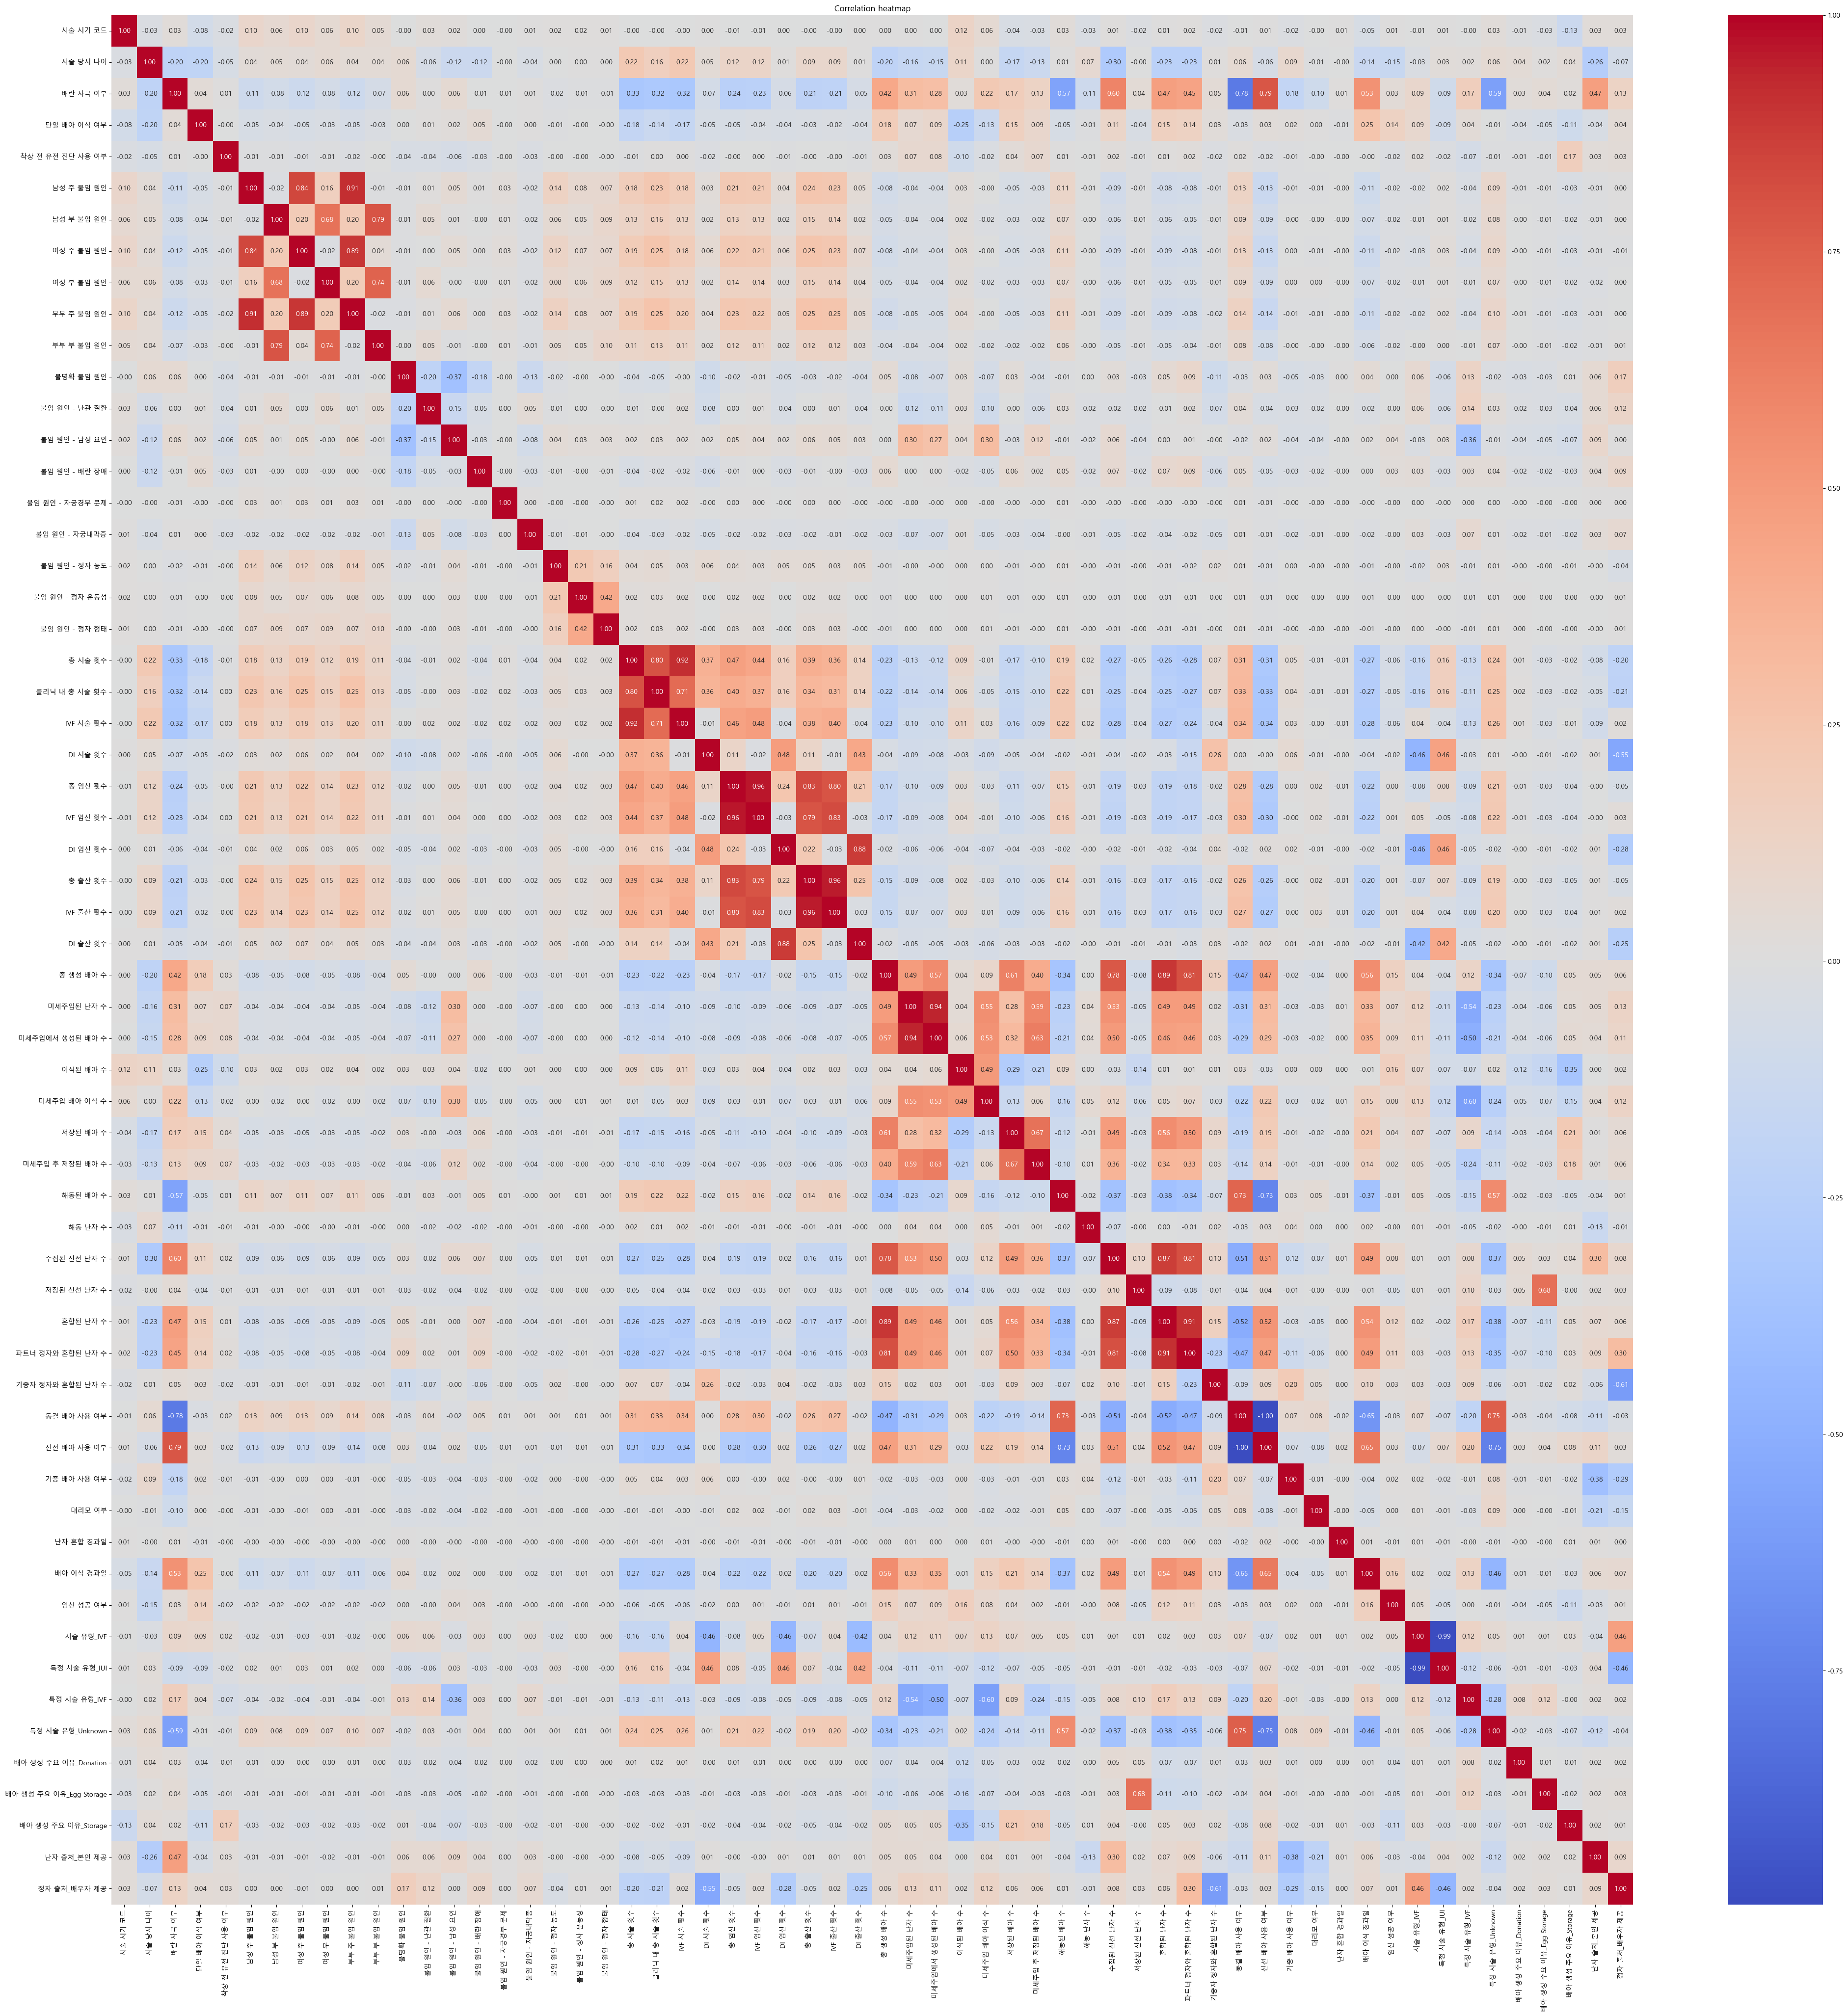

In [49]:
correlation_matrix = train.corr()

# 히트맵 그리기
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, 
            annot=True,        # 상관계수 숫자 표시
            fmt=".2f",         # 소수점 둘째 자리까지 표시
            cmap='coolwarm',   # 색상 팔레트
            cbar=True)         # 컬러 바 표시
plt.title('Correlation heatmap')
plt.show()


In [50]:
# 상관행렬 계산
corr_matrix = train.corr()

# 상관관계가 0.9 이상인 값만 선택 (자기 자신과의 상관관계 제외)
high_corr = corr_matrix[(corr_matrix > 0.9) & (corr_matrix < 1)]

# 결과를 변수와 해당 변수와 0.9 이상인 상관관계를 가진 다른 변수들로 출력
for col in high_corr.columns:
    related_vars = high_corr[col].dropna()  # 결측치 제외
    related_vars = related_vars[related_vars > 0.9]  # 0.9 이상인 값만 선택
    if len(related_vars) > 0:  # 상관관계가 0.9 이상인 값이 있을 경우
        print(f"{col}: {', '.join([f'{var}: {related_vars[var]:.2f}' for var in related_vars.index])}")


남성 주 불임 원인: 부부 주 불임 원인: 0.91
부부 주 불임 원인: 남성 주 불임 원인: 0.91
총 시술 횟수: IVF 시술 횟수: 0.92
IVF 시술 횟수: 총 시술 횟수: 0.92
총 임신 횟수: IVF 임신 횟수: 0.96
IVF 임신 횟수: 총 임신 횟수: 0.96
총 출산 횟수: IVF 출산 횟수: 0.96
IVF 출산 횟수: 총 출산 횟수: 0.96
미세주입된 난자 수: 미세주입에서 생성된 배아 수: 0.94
미세주입에서 생성된 배아 수: 미세주입된 난자 수: 0.94
혼합된 난자 수: 파트너 정자와 혼합된 난자 수: 0.91
파트너 정자와 혼합된 난자 수: 혼합된 난자 수: 0.91


In [51]:
train.drop(columns=['남성 주 불임 원인','IVF 시술 횟수','IVF 임신 횟수','IVF 출산 횟수','미세주입에서 생성된 배아 수',
                    '파트너 정자와 혼합된 난자 수'],inplace=True)
test.drop(columns=['남성 주 불임 원인','IVF 시술 횟수','IVF 임신 횟수','IVF 출산 횟수','미세주입에서 생성된 배아 수',
                    '파트너 정자와 혼합된 난자 수'],inplace=True)

In [52]:
# 상관행렬 계산
corr_matrix = train.corr()

# 상관관계가 0.8 이상인 값만 선택 (자기 자신과의 상관관계 제외)
high_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1)]

# 결과를 변수와 해당 변수와 0.8 이상인 상관관계를 가진 다른 변수들로 출력
for col in high_corr.columns:
    related_vars = high_corr[col].dropna()  # 결측치 제외
    related_vars = related_vars[related_vars > 0.8]  # 0.8 이상인 값만 선택
    if len(related_vars) > 0:  # 상관관계가 0.8 이상인 값이 있을 경우
        print(f"{col}: {', '.join([f'{var}: {related_vars[var]:.2f}' for var in related_vars.index])}")

여성 주 불임 원인: 부부 주 불임 원인: 0.89
부부 주 불임 원인: 여성 주 불임 원인: 0.89
총 임신 횟수: 총 출산 횟수: 0.83
DI 임신 횟수: DI 출산 횟수: 0.88
총 출산 횟수: 총 임신 횟수: 0.83
DI 출산 횟수: DI 임신 횟수: 0.88
총 생성 배아 수: 혼합된 난자 수: 0.89
수집된 신선 난자 수: 혼합된 난자 수: 0.87
혼합된 난자 수: 총 생성 배아 수: 0.89, 수집된 신선 난자 수: 0.87


In [53]:
train.drop(columns=['여성 주 불임 원인','DI 임신 횟수','DI 출산 횟수','혼합된 난자 수'],inplace=True)
test.drop(columns=['여성 주 불임 원인','DI 임신 횟수','DI 출산 횟수','혼합된 난자 수'],inplace=True)

In [54]:
# 상관행렬 계산
corr_matrix = train.corr()

# 상관관계가 0.7 이상인 값만 선택 (자기 자신과의 상관관계 제외)
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]

# 결과를 변수와 해당 변수와 0.7 이상인 상관관계를 가진 다른 변수들로 출력
for col in high_corr.columns:
    related_vars = high_corr[col].dropna()  # 결측치 제외
    related_vars = related_vars[related_vars >= 0.7]  # 0.7 이상인 값만 선택
    if len(related_vars) > 0:  # 상관관계가 0.7 이상인 값이 있을 경우
        print(f"{col}: {', '.join([f'{var}: {related_vars[var]:.2f}' for var in related_vars.index])}")

배란 자극 여부: 신선 배아 사용 여부: 0.79
남성 부 불임 원인: 부부 부 불임 원인: 0.79
여성 부 불임 원인: 부부 부 불임 원인: 0.74
부부 부 불임 원인: 남성 부 불임 원인: 0.79, 여성 부 불임 원인: 0.74
총 시술 횟수: 클리닉 내 총 시술 횟수: 0.80
클리닉 내 총 시술 횟수: 총 시술 횟수: 0.80
총 임신 횟수: 총 출산 횟수: 0.83
총 출산 횟수: 총 임신 횟수: 0.83
총 생성 배아 수: 수집된 신선 난자 수: 0.78
해동된 배아 수: 동결 배아 사용 여부: 0.73
수집된 신선 난자 수: 총 생성 배아 수: 0.78
동결 배아 사용 여부: 해동된 배아 수: 0.73, 특정 시술 유형_Unknown: 0.75
신선 배아 사용 여부: 배란 자극 여부: 0.79
특정 시술 유형_Unknown: 동결 배아 사용 여부: 0.75


In [55]:
train.drop(columns=['부부 부 불임 원인','총 시술 횟수','총 출산 횟수','수집된 신선 난자 수','동결 배아 사용 여부',
                    '신선 배아 사용 여부'],inplace=True)
test.drop(columns=['부부 부 불임 원인','총 시술 횟수','총 출산 횟수','수집된 신선 난자 수','동결 배아 사용 여부',
                    '신선 배아 사용 여부'],inplace=True)

## 모델 학습

In [57]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import numpy as np

# ✅ 데이터 분할
X = train.drop(columns=['임신 성공 여부'])
y = train['임신 성공 여부']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
"""
# ✅ 모델 정의
models = {
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1),
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1),
    "Extra Trees": ExtraTreesClassifier(random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1)
}

# ✅ 하이퍼파라미터 범위 정의
param_grids = {
    "CatBoost": {"iterations": [300, 500], "learning_rate": [0.05, 0.1], "depth": [6, 10]},
    "LightGBM": {"n_estimators": [300, 300], "max_depth": [6, 10], "learning_rate": [0.05, 0.1]},
    "XGBoost": {"n_estimators": [300, 500], "learning_rate": [0.05, 0.1], "max_depth": [5, 10]},
    "Extra Trees": {"n_estimators": [300, 500], "max_depth": [6, 10], "min_samples_split": [5, 10]},
    "Random Forest": {"n_estimators": [300, 500], "max_depth": [5, 10], "min_samples_split": [5, 10]}
}

# ✅ RandomizedSearchCV로 최적의 파라미터 탐색
best_models = {}
best_params = {}  # 최적의 하이퍼파라미터 저장할 딕셔너리 추가

for name, model in models.items():
    print(f"최적화 중: {name}")
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], 
                                       n_iter=3, cv=3, random_state=42, n_jobs=1, verbose=1)
    random_search.fit(X_train, y_train)
    best_models[name] = random_search.best_estimator_
    best_params[name] = random_search.best_params_  # 최적의 파라미터 저장

# ✅ 최적 모델 평가
for name, model in best_models.items():
    # predict_proba로 확률 예측
    y_prob = model.predict_proba(X_test)[:, 1]  # 양성 클래스 확률을 선택 (두 번째 열)
    
    # AUC 계산
    auc = roc_auc_score(y_test, y_prob)
    print(f"{name} AUC: {auc:.4f}")
    
    # 최적 하이퍼파라미터 출력
    print(f"{name} 최적 하이퍼파라미터: {best_params[name]}")
"""

'\n# ✅ 모델 정의\nmodels = {\n    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),\n    "LightGBM": LGBMClassifier(random_state=42, n_jobs=-1),\n    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1),\n    "Extra Trees": ExtraTreesClassifier(random_state=42, n_jobs=-1),\n    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1)\n}\n\n# ✅ 하이퍼파라미터 범위 정의\nparam_grids = {\n    "CatBoost": {"iterations": [300, 500], "learning_rate": [0.05, 0.1], "depth": [6, 10]},\n    "LightGBM": {"n_estimators": [300, 300], "max_depth": [6, 10], "learning_rate": [0.05, 0.1]},\n    "XGBoost": {"n_estimators": [300, 500], "learning_rate": [0.05, 0.1], "max_depth": [5, 10]},\n    "Extra Trees": {"n_estimators": [300, 500], "max_depth": [6, 10], "min_samples_split": [5, 10]},\n    "Random Forest": {"n_estimators": [300, 500], "max_depth": [5, 10], "min_samples_split": [5, 10]}\n}\n\n# ✅ RandomizedSearchCV로 최적의 파라미터 탐색\nbest_models = {}\nbest_params = {}  # 최적의 하이퍼파라미터 저장할 딕셔너리 추가\n\nfor

In [60]:
models = {
    "Extra Trees": ExtraTreesClassifier(max_depth= 10, min_samples_split = 5, n_estimators = 500, random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(depth = 6, iterations= 300, learning_rate= 0.05, verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(max_depth=6, learning_rate= 0.05, n_estimators= 300, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(max_depth = 5, learning_rate= 0.05, n_estimators=500, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(max_depth=10, n_estimators=500, min_samples_split=5, random_state=42),
}


In [74]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [68]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

In [76]:
# ✅ 각 모델별 Test 예측값을 저장할 리스트 (Soft Voting 적용을 위한 확률 평균)
test_predictions = {name: np.zeros((X_test.shape[0], 2)) for name in models.keys() if hasattr(models[name], "predict_proba")}
submission_predictions = {name: np.zeros((test.shape[0], 2)) for name in models.keys() if hasattr(models[name], "predict_proba")}

# ✅ KFold 적용
roc_auc_scores = []  # ROC-AUC 점수 저장 리스트

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n=== Fold {fold+1} ===")

    # KFold 데이터 분할
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # `predict_proba()`를 지원하는 모델만 사용
            print(f"\n--- Training {name} ---")
            
            # 모델 학습
            model.fit(X_train_fold, Y_train_fold)

            # 훈련 세트 성능 평가
            Y_train_pred = model.predict(X_train_fold)
            print("\n--- Training Set Performance ---")
            print(classification_report(Y_train_fold, Y_train_pred))

            # 검증 세트 성능 평가
            Y_val_pred = model.predict(X_val_fold)
            print("\n--- Validation Set Performance ---")
            print(classification_report(Y_val_fold, Y_val_pred))

            # ✅ ROC-AUC 점수 계산 및 저장
            Y_val_pred_proba = model.predict_proba(X_val_fold)[:, 1]  # Positive Class 확률
            roc_auc = roc_auc_score(Y_val_fold, Y_val_pred_proba)
            roc_auc_scores.append(roc_auc)
            print(f"📊 ROC-AUC (Fold {fold+1}, {name}): {roc_auc:.4f}")

            # ✅ X_test 예측값 저장 (Soft Voting을 위해 확률 예측값 사용)
            test_predictions[name] += model.predict_proba(X_test) / kf.n_splits  # 확률 평균 계산
            
            # ✅ 실제 test.csv 데이터 예측값 저장
            submission_predictions[name] += model.predict_proba(test) / kf.n_splits  # 확률 평균 계산

        else:
            print(f"⚠ Warning: {name} 모델은 `predict_proba()`를 지원하지 않습니다. 제외됨.")


# ✅ Platt Scaling (Sigmoid) 적용
calibrated_lgbm = CalibratedClassifierCV(models["LightGBM"], method="sigmoid", cv=5)
calibrated_lgbm.fit(X_resampled, y_resampled)

# ✅ 보정된 확률 예측
calibrated_pred_proba_test = calibrated_lgbm.predict_proba(X_test)[:, 1]
calibrated_pred_proba_submission = calibrated_lgbm.predict_proba(test)[:, 1]

# ✅ ROC-AUC 평가
calibrated_roc_auc = roc_auc_score(Y_test, calibrated_pred_proba_test)
print(f"\n📊 Calibrated LightGBM ROC-AUC Score (Sigmoid): {calibrated_roc_auc:.4f}")

# ✅ test.csv에 대한 예측 확률 보정 적용
calibrated_pred_proba_submission = calibrated_lgbm.predict_proba(test)[:, 1]

# ✅ Soft Voting 가중치 변경 (LightGBM의 영향력 증가)
ensemble_pred_proba_test = (
    calibrated_pred_proba_test * 0.6 +  # LightGBM 60%
    test_predictions["XGBoost"][:, 1] * 0.2 +  # XGBoost 20%
    test_predictions["CatBoost"][:, 1] * 0.2  # CatBoost 20%
)

ensemble_pred_proba_submission = (
    calibrated_pred_proba_submission * 0.6 +
    submission_predictions["XGBoost"][:, 1] * 0.2 +
    submission_predictions["CatBoost"][:, 1] * 0.2
)


# ✅ 최적 Threshold 찾기
from sklearn.metrics import precision_recall_curve

# ✅ Precision-Recall Curve 기반 최적 Threshold 찾기
precision, recall, thresholds = precision_recall_curve(Y_test, ensemble_pred_proba_test)
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores[:-1].argmax()]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ✅ 최적 Threshold 적용 후 예측값 변환
Y_test_pred = (calibrated_pred_proba_test > 0.5).astype(int)

print("\n=== Final Test Evaluation with Optimized Threshold ===")
print(classification_report(Y_test, Y_test_pred))



=== Fold 1 ===

--- Training Extra Trees ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85    121470
           1       1.00      0.00      0.00     42594

    accuracy                           0.74    164064
   macro avg       0.87      0.50      0.43    164064
weighted avg       0.81      0.74      0.63    164064


--- Validation Set Performance ---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     30508
           1       0.40      0.00      0.00     10508

    accuracy                           0.74     41016
   macro avg       0.57      0.50      0.43     41016
weighted avg       0.66      0.74      0.63     41016

📊 ROC-AUC (Fold 1, Extra Trees): 0.7263

--- Training CatBoost ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.76      0.97      0.85    121470
           1       0

C:\Users\jeongbin\projects\lg_aimers_project\venv_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeongbin\projects\lg_aimers_project\venv_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeongbin\projects\lg_aimers_project\venv_310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

📊 ROC-AUC (Fold 5, Extra Trees): 0.7262

--- Training CatBoost ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.76      0.97      0.85    121581
           1       0.58      0.11      0.18     42483

    accuracy                           0.75    164064
   macro avg       0.67      0.54      0.52    164064
weighted avg       0.71      0.75      0.68    164064


--- Validation Set Performance ---
              precision    recall  f1-score   support

           0       0.75      0.97      0.85     30397
           1       0.53      0.10      0.17     10619

    accuracy                           0.74     41016
   macro avg       0.64      0.53      0.51     41016
weighted avg       0.70      0.74      0.67     41016

📊 ROC-AUC (Fold 5, CatBoost): 0.7405

--- Training LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 42483, number of negative: 

NameError: name 'X_resampled' is not defined

In [80]:
# ✅ Platt Scaling (Sigmoid) 적용
calibrated_lgbm = CalibratedClassifierCV(models["LightGBM"], method="sigmoid", cv=5)
calibrated_lgbm.fit(X_train, y_train)

# ✅ 보정된 확률 예측
calibrated_pred_proba_test = calibrated_lgbm.predict_proba(X_test)[:, 1]
calibrated_pred_proba_submission = calibrated_lgbm.predict_proba(test)[:, 1]

# ✅ ROC-AUC 평가
calibrated_roc_auc = roc_auc_score(y_test, calibrated_pred_proba_test)
print(f"\n📊 Calibrated LightGBM ROC-AUC Score (Sigmoid): {calibrated_roc_auc:.4f}")

# ✅ test.csv에 대한 예측 확률 보정 적용
calibrated_pred_proba_submission = calibrated_lgbm.predict_proba(test)[:, 1]

# ✅ Soft Voting 가중치 변경 (LightGBM의 영향력 증가)
ensemble_pred_proba_test = (
    calibrated_pred_proba_test * 0.6 +  # LightGBM 60%
    test_predictions["XGBoost"][:, 1] * 0.2 +  # XGBoost 20%
    test_predictions["CatBoost"][:, 1] * 0.2  # CatBoost 20%
)

ensemble_pred_proba_submission = (
    calibrated_pred_proba_submission * 0.6 +
    submission_predictions["XGBoost"][:, 1] * 0.2 +
    submission_predictions["CatBoost"][:, 1] * 0.2
)


# ✅ 최적 Threshold 찾기
from sklearn.metrics import precision_recall_curve

# ✅ Precision-Recall Curve 기반 최적 Threshold 찾기
precision, recall, thresholds = precision_recall_curve(y_test, ensemble_pred_proba_test)
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores[:-1].argmax()]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ✅ 최적 Threshold 적용 후 예측값 변환
Y_test_pred = (calibrated_pred_proba_test > 0.5).astype(int)

print("\n=== Final Test Evaluation with Optimized Threshold ===")
print(classification_report(y_test, Y_test_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 42482, number of negative: 121582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 164064, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258936 -> initscore=-1.051508
[LightGBM] [Info] Start training from score -1.051508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [82]:
submit['probability'] = ensemble_pred_proba_submission

In [84]:
 submit.to_csv('submit.csv', index=False)